In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# show all outputs of a cell (such as if df.head() and df.tail() are in the same cell)
#default is 'last_expr'

In [21]:
%matplotlib inline
import pandas as pd
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

In [22]:
esm = pd.read_excel('/Users/Work/Desktop/Work/Projects/ESMdata/ESMdata.xlsx'\
                    ,sheetname='Sheet1')

In [23]:
Y=esm.phase
X1=esm.drop('phase',axis=1)
X2=X1.iloc[:,8:-14].drop(['soc_who1','soc_who2','soc_who3','act_what1','act_what2','event_cause',
                     'event_concern','event_pertain',],axis=1)
X3=X2.drop(['event_freq','soc_together','soc_prefalone','soc_pleasant','soc_belong',\
        'soc_prefcomp','soc_enjoy_alone','mor_med','mor_qualsleep','mor_lieawake',\
       'mor_nrwakeup','mor_asleep','mor_feellike','evn_ordinary','evn_niceday',\
       'evn_inflmood','evn_pager','evn_work','evn_med','event_disturb'],axis=1)
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
X = pd.DataFrame(fill_NaN.fit_transform(X3))
X.columns = X3.columns
X.index = X3.index

# K-Fold Cross Validation

**n_splits = K** means that K splits are created and each split is treated as a test split once, while the other (K-1) splits are used to train the data.

**kf.split(X)** generates train/test split indices.  <br>
The test split is one of the K folds and equals 1/K % of the total data. <br>
Returns a generator and when list() is placed on it, returns a list of K tuples of size 2 of <br>
(train split K indices, test split K indices).  The train split always has a size equal to the other K-1 folds, which is (1-1/K)% of the data.  Use a for statement to loop through the tuples and use value 0 indices to generate a train split an value 1 indicies to generate a test split for each of the K tuples.  This will result in K datasets and K models. <br>

kf.split(X) creates test split sizes that are (1/K)% of the data and train split sizes that are (1-1/K)% of the data.<br>.  All points are eventually used in the train split as well as the test split. <br>

**shuffle=True** shuffles the data before splitting into K folds.  If False, then the train split is literally just the last (1-1/K)% of the data points (the last data points), and the test split is the first 1/K% of data points.  So the train split is the first N number of data points where those N points fall within the first K-1 folds, and the test split's data points are the last data points, which are in the Kth fold.   If True, the folds are created from random indices, so that the Kth fold is not composed of points that are necessarily next to each other nor next to points in the (K-1) fold.  

In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True,random_state=1)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
    Y_train, Y_test = Y[train_index], Y[test_index]
#iloc for the X dataframe and [] for the Y Series

In [25]:
list(kf.split(X))[0] # the first train / test split in the list of 10 train/test split tuples

(array([   0,    1,    2, ..., 1473, 1474, 1475]),
 array([   3,   19,   37,   48,   49,   53,   60,   80,   91,  101,  104,
         107,  111,  119,  140,  167,  177,  194,  201,  223,  227,  248,
         258,  259,  267,  268,  288,  292,  301,  321,  325,  330,  341,
         368,  375,  390,  399,  400,  404,  414,  424,  432,  460,  464,
         480,  487,  498,  521,  527,  531,  553,  556,  561,  575,  577,
         579,  598,  599,  612,  628,  629,  632,  647,  660,  664,  675,
         683,  697,  707,  729,  730,  731,  735,  736,  742,  748,  750,
         765,  786,  789,  812,  813,  817,  821,  826,  833,  855,  858,
         870,  892,  898,  899,  902,  904,  921,  926,  927,  968,  982,
         984,  987,  994, 1003, 1013, 1016, 1020, 1074, 1079, 1080, 1090,
        1100, 1123, 1126, 1127, 1142, 1152, 1156, 1158, 1177, 1189, 1194,
        1201, 1204, 1205, 1209, 1216, 1220, 1228, 1230, 1234, 1280, 1282,
        1319, 1329, 1338, 1340, 1349, 1364, 1377, 1384, 1401,

# Stratified K-Fold Cross Validation

If there is a class imbalance (for the target variable), where some classes are rare and others are common, then by using stratified k-fold cross validation, folds are made by preserving the percentage of samples for each class.

In [26]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
for train_index, test_index in skf.split(X,Y):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:] 
    Y_train, Y_test = Y[train_index], Y[test_index]
#iloc for the X dataframe and [] for the Y Series

In [27]:
list(skf.split(X,Y))[0]

(array([   0,    1,    2, ..., 1473, 1474, 1475]),
 array([   4,   11,   14,   19,   35,   42,   53,   69,   94,  105,  106,
         110,  119,  126,  127,  136,  150,  163,  177,  187,  188,  194,
         201,  218,  232,  247,  257,  262,  276,  294,  299,  306,  309,
         321,  327,  336,  341,  345,  352,  358,  361,  370,  374,  378,
         387,  394,  402,  427,  434,  446,  469,  493,  496,  500,  510,
         515,  522,  528,  533,  538,  561,  573,  623,  625,  633,  643,
         652,  666,  677,  680,  695,  698,  776,  785,  793,  801,  810,
         821,  836,  839,  841,  844,  853,  865,  879,  886,  888,  894,
         902,  904,  907,  909,  927,  930,  938,  944,  951,  954,  960,
         967, 1002, 1011, 1026, 1037, 1042, 1046, 1060, 1075, 1080, 1089,
        1090, 1093, 1111, 1114, 1146, 1150, 1180, 1182, 1203, 1237, 1246,
        1249, 1256, 1257, 1259, 1269, 1272, 1274, 1276, 1277, 1281, 1291,
        1322, 1328, 1341, 1365, 1376, 1383, 1386, 1388, 1399,

# Managing Error and Complexity

# Learning Curve

The learning curve shows how a model's score improves as it is trained on more data.  <br>
A learning curve in machine learning is a graph that compares the performance of a model on training and testing data over a varying number of training instances. <br>

Specifically, it shows scores for models built off a certain amount of training data, where each score is actually the average score from K models built using a certain amount of training data (assuming K-Fold CV is the cross validation method).  

For each number of training examples, the learning curve gives the average score from models built using that certain number of training examples. <br>

If K-Fold Cross Validation is used as a parameter, then for each number of training examples, K models are built off that number of training examples and their scores are averaged.  Thus, when building models off 10% of the data, you see the average scores for models built from 10% of the data.  Actually though, each of the K models is only built off (1-1/K)x10% of the data, since K-1 folds are used to train each model.  

# sklearn.model_selection.learning_curve

In [13]:
o = open('/Users/Work/Desktop/Work/Projects/Springboard/Final_Files/Starbucks_Y.pkl','r')
Y=pickle.load(o)
o.close()
o = open('/Users/Work/Desktop/Work/Projects/Springboard/Final_Files/Starbucks_X.pkl','r')
X=pickle.load(o)
o.close()

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import explained_variance_score, mean_squared_error, make_scorer

Provides 3 arrays<br>
1) train_sizes: Training set sizes<br>
2) train_scores: Scores on K training sets for each training set size<br>
3) test_scores Scores on K test sets for each training set size <br>
K scores for each training set size are provided when K-Fold CV is used. <br>  We then average the scores for each training set size and plot the average score per size!

**scoring = None ** score shown on the y-axis, like mean squared error and accuracy. <br>
by default assumes and uses the scoring method of the provided estimator: estimator.score<br>
For regressors, this seems to be the R^2 (coefficient of determination <br>
For classifiers, the accuracy score (TP+TN / total samples) <br>

**train_sizes = None**  
Default is Default is np.linspace(.1, 1.0, 5), so use 10% of data to build model, 32.5% of data, 55% of data, etc.<br>
The numbers of training examples used to build the learning curve. <br>
An array of the number of training examples, where K models are built for each number of training examples and the average score is determined. <br>
An array of the number of training examples to be used in generating the curve.  <br>

Thus for 10%, we come up with the average score for K models built using K-Fold CV on just 10% of the data.  <br>We then use 32.5% of the data to come up with the average score for K models built using K-Fold CV on just 32.5% of the data. <br>  Each of the K models is actually built on less than the 10% of data, since each is built using (K-1) folds, so each model is of size ((1-1/K)% x 10% x data)

Integers represent actual number of training examples to use in building the curve. <br>
Floats represent % of total training examples to use in building the curve. <br>


**cv = None ** by default performs 3-Fold Cross Validation

In [15]:
#Specify learning_curve parameters
estimator=sklearn.linear_model.LinearRegression()
train_sizes=np.linspace(.1, 1.0, 5)
cv=KFold(n_splits=5,shuffle=True,random_state=1)
score=make_scorer(mean_squared_error)

In [16]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, Y, cv=cv,train_sizes=train_sizes,scoring=score)

In [17]:
#The size of each of the K models built off x% of the data is actually (x% * (1-1/K)) of the data, since K-1 folds are 
#used to train the models
np.linspace(.1, 1.0, 5)
train_sizes
494*.1*(4/5.0) 
494*.325*(4/5.0) 

array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ])

array([ 39, 128, 217, 306, 395])

39.52000000000001

128.44000000000003

In [18]:
test_scores # 5 scores are calculated for each x% of the data used in building the model
#we average each of these array's scores to get the average score for models built off x% of the data

array([[ 0.7729448 ,  0.50457687,  0.6006081 ,  0.55490208,  0.46337741],
       [ 0.34538398,  0.40513257,  0.41018643,  0.44866029,  0.41608729],
       [ 0.3550316 ,  0.37175696,  0.39806495,  0.41895473,  0.4013354 ],
       [ 0.35714612,  0.37703515,  0.39442704,  0.41405022,  0.417843  ],
       [ 0.36203869,  0.38008329,  0.3928462 ,  0.40772015,  0.4068261 ]])

In [19]:
train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1) 
train_scores_mean #average score on test set for models built off x% of the data
test_scores_mean #average score on test set for models built off x% of the data

array([ 0.25312749,  0.3450756 ,  0.36295229,  0.36803459,  0.36036845])

array([ 0.57928185,  0.40509011,  0.38902873,  0.3921003 ,  0.38990288])

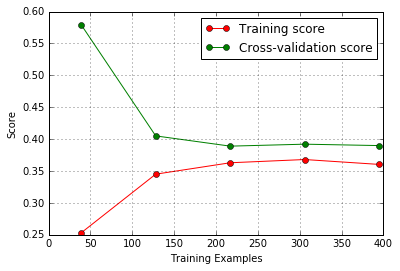

In [20]:
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.ylabel("Score")
plt.xlabel("Training Examples")
plt.legend(loc="best")

# Learning Curve Function

In [11]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot_learning_curve(estimator, X, Y, title=None, ylim=None, cv=None,
                        train_sizes=None,scoring=None):

    #create train sizes, train scores, #test scores
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, Y, cv=cv,train_sizes=train_sizes,scoring=scoring)
    
    #create average scores for each train sizes
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    #plot average scores for each train size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    
    #plot aesthetics
    plt.grid()
    if ylim is not None:
        plt.ylim(*ylim) 
    plt.ylabel("Score")
    plt.xlabel("Training Examples")
    plt.title(title)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/Work/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

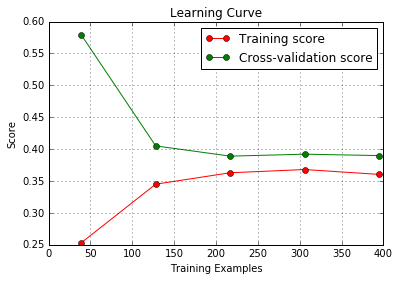

In [12]:
estimator=sklearn.linear_model.LinearRegression()
train_sizes=np.linspace(.1, 1.0, 5)
cv=KFold(n_splits=5,shuffle=True,random_state=1)
score=make_scorer(mean_squared_error)

plot_learning_curve(estimator=estimator,X=X,Y=Y,title='Learning Curve',train_sizes=train_sizes, cv=cv, scoring=score)

When the number of training instances is low, the model has high variance, so it overfits and does not generalize well.  This means it performs poorly on the testing set, as evidenced by the gap in the scores.   <br>

When the number of training instances is higher, the variance is low, and the model generalizes better by not overfitting, since its performance on the testing and training sets converges.